In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

from xgboost import XGBClassifier

%matplotlib inline

In [308]:
data = pd.read_csv("C:\\Users\\Casey\\Desktop\\DS projects\\Titanic\\Raw data\\train-3.csv", header=0)
test_data = pd.read_csv("C:\\Users\\Casey\\Desktop\\DS projects\\Titanic\\Raw data\\test-3.csv", header=0)

print(data.head())
print(test_data.head())

   Pclass  Sex  Age  Fare  Family Size  S  C  Q  Name  IsAlone  Survived
0       3    1    1     0            1  1  0  0     2        0         0
1       1    0    2     3            1  0  1  0     3        0         1
2       3    0    1     1            0  1  0  0     1        1         1
3       1    0    2     3            1  1  0  0     3        0         1
4       3    1    2     1            0  1  0  0     2        1         0
   Pclass  Sex  Age  Fare  Family Size  S  C  Q  Name  IsAlone
0       3    1    2     0            0  0  0  1     2        1
1       3    0    2     0            1  1  0  0     3        0
2       2    1    3     1            0  0  0  1     2        1
3       3    1    1     1            0  1  0  0     2        1
4       3    0    1     1            1  1  0  0     3        0


In [309]:
array = data.values
X = array[:,0:10]
Y = array[:,10]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [310]:
#Implement various algorithms
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))

#Evaluate each model using 10-fold cross-validation
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

RF: 0.742973 (0.054485)
GB: 0.764931 (0.034631)
XGB: 0.756514 (0.039904)


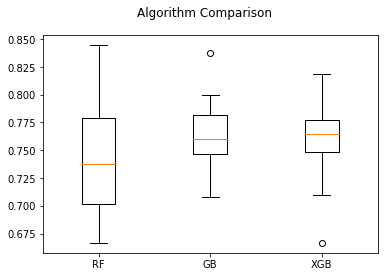

In [311]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [312]:
X_test = test_data.values
print(X_test.shape)

(418, 10)


In [313]:
gb = GradientBoostingClassifier(learning_rate = 0.5, n_estimators = 100)
#We are training our Random Forest using the fit() function on our training data
gb.fit(X_train, Y_train)
#Now that the model has been trained, we can use it to make predictions
predictions = gb.predict(X_validation)

print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print('Accuracy score: ', end = " ")
print(accuracy_score(Y_validation, predictions))

[[101   9]
 [ 24  45]]
             precision    recall  f1-score   support

          0       0.81      0.92      0.86       110
          1       0.83      0.65      0.73        69

avg / total       0.82      0.82      0.81       179

Accuracy score:  0.815642458101


In [314]:
xgb = XGBClassifier(learning_rate = 1, n_estimators = 100)
#We are training our Random Forest using the fit() function on our training data
xgb.fit(X_train, Y_train)
#Now that the model has been trained, we can use it to make predictions
predictions = xgb.predict(X_validation)

print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print('Accuracy score: ', end = " ")
print(accuracy_score(Y_validation, predictions))

[[101   9]
 [ 24  45]]
             precision    recall  f1-score   support

          0       0.81      0.92      0.86       110
          1       0.83      0.65      0.73        69

avg / total       0.82      0.82      0.81       179

Accuracy score:  0.815642458101


In [315]:
#predictions:
xgb = XGBClassifier(learning_rate = 0.5, n_estimators = 100)

xgb.fit(X_train, Y_train)

predictions = xgb.predict(X_test)

print(predictions)

results_csv = pd.DataFrame(predictions)
#results_csv.to_csv("my-eighth-sub.csv")

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 1]


In [316]:
rf = RandomForestClassifier()
#We are training our Random Forest using the fit() function on our training data
rf.fit(X_train, Y_train)
#Now that the model has been trained, we can use it to make predictions
predictions = rf.predict(X_validation)

print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print('Accuracy score: ', end = " ")
print(accuracy_score(Y_validation, predictions))

[[100  10]
 [ 27  42]]
             precision    recall  f1-score   support

          0       0.79      0.91      0.84       110
          1       0.81      0.61      0.69        69

avg / total       0.80      0.79      0.79       179

Accuracy score:  0.793296089385
